In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


data_lei = fits.open('/home/fmq/MESA/work/my/observe_data/lei2023/sd_mass_0p20.fits')
num_rows = data_lei[1].data.shape[0]
print(f"The number of rows is {num_rows}")
Teff=data_lei[1].data['teff']
logg=data_lei[1].data['logg']
loghe=data_lei[1].data['loghe']
he_class = data_lei[1].data['sp_class']
L=data_lei[1].data['l_div_lsun_median']

loghe = np.array([str(x).replace('>', '') for x in loghe])
loghe = np.array([float(x) for x in loghe])
Y_surf = 0.98*10**loghe/(1/4+10**loghe)

log_Teff = np.log10(Teff)
log_L = np.log10(L)
mass = data_lei[1].data['mass_median']
radius = data_lei[1].data['radius_median']


The number of rows is 664


<function matplotlib.pyplot.show(close=None, block=None)>

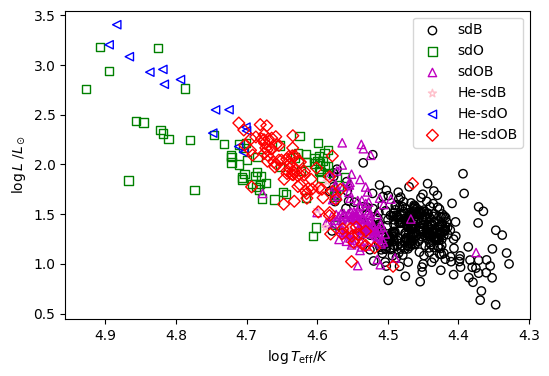

In [2]:
plt.figure(dpi=100, figsize=(6, 4))
ax = plt.gca()
# 创建一个字典来映射 he_class 的值到颜色和标记
class_to_marker = {
    'sdB': ('k', 'o'),  # 黑色圆圈
    'sdO': ('g', 's'),  # 绿色正方形
    'sdOB': ('m', '^'),  # 紫色正三角形
    'He-sdB': ('pink', '*'),  # 粉红色五角星
    'He-sdO': ('b', '<'),  # 蓝色左三角
    'He-sdOB': ('r', 'D')  # 红色菱形
}
for cls, (color, marker) in class_to_marker.items():
        mask = he_class == cls
        ax.scatter(log_Teff[mask], log_L[mask], color=color, marker=marker, facecolors='none', label=cls)
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log L$ /$L_\odot$')
ax.legend()
ax.invert_xaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

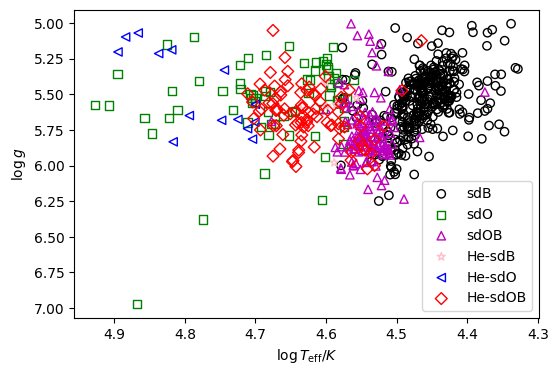

In [3]:
plt.figure(dpi=100, figsize=(6, 4))
ax = plt.gca()
for cls, (color, marker) in class_to_marker.items():
        mask = he_class == cls
        ax.scatter(log_Teff[mask], logg[mask], color=color, marker=marker, facecolors='none', label=cls)
ax.legend()
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show

/tmp/ipykernel_4643/3744600102.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


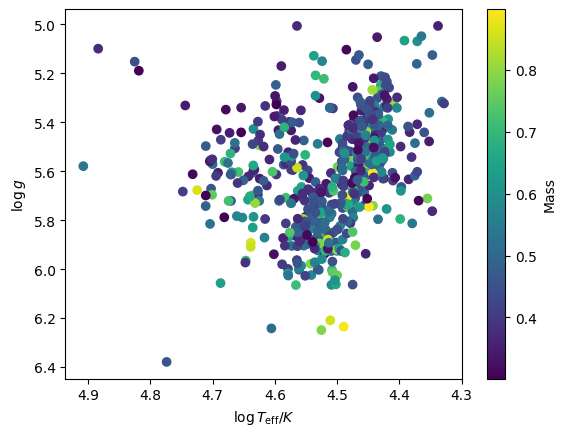

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()
# 假设你的数据在x, y和mass变量中


# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射
mask = (mass > 0.3) & (mass < 0.9)
sc = plt.scatter(log_Teff[mask], logg[mask], c=mass[mask], cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Mass')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()

/tmp/ipykernel_4643/3515410457.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


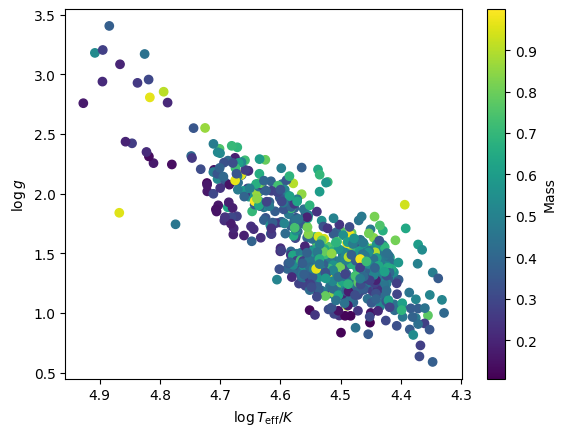

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()
# 假设你的数据在x, y和mass变量中


# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射

sc = plt.scatter(log_Teff, log_L, c=mass, cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Mass')
ax.invert_xaxis()
# ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

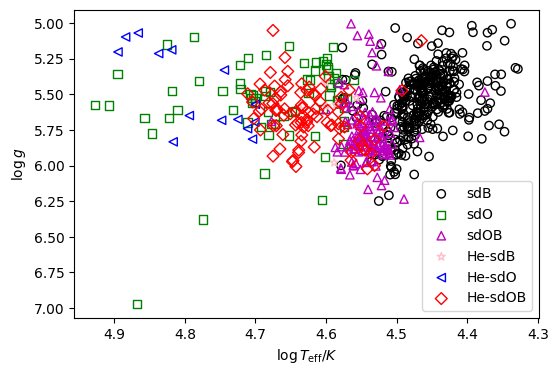

In [ ]:
plt.figure(dpi=100, figsize=(6, 4))
ax = plt.gca()
for cls, (color, marker) in class_to_marker.items():
        mask = he_class == cls
        ax.scatter(log_Teff[mask], logg[mask], color=color, marker=marker, facecolors='none', label=cls)
ax.legend()
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show

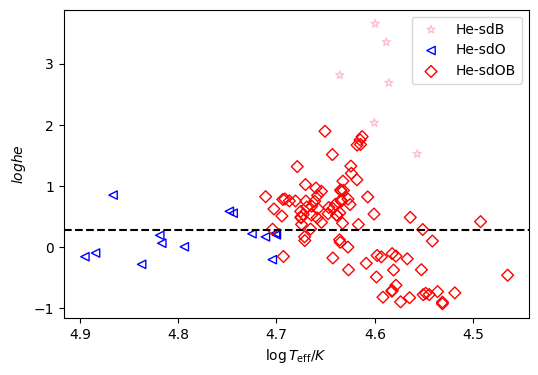

In [4]:
plt.figure(dpi=100, figsize=(6, 4))
ax = plt.gca()
# 创建一个字典来映射 he_class 的值到颜色和标记
class_to_marker = {
    'sdB': ('k', 'o'),  # 黑色圆圈
    'sdO': ('g', 's'),  # 绿色正方形
    'sdOB': ('m', '^'),  # 紫色正三角形
    'He-sdB': ('pink', '*'),  # 粉红色五角星
    'He-sdO': ('b', '<'),  # 蓝色左三角
    'He-sdOB': ('r', 'D')  # 红色菱形
}

for cls, (color, marker) in class_to_marker.items():
    if cls in ['He-sdB', 'He-sdO', 'He-sdOB']:
        mask = he_class == cls
        ax.scatter(log_Teff[mask], loghe[mask], color=color, marker=marker, facecolors='none', label=cls)
plt.axhline(y=0.28, color='black', linestyle='dashed')
ax.legend()
ax.invert_xaxis()
# ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log L$ /$L_\odot$')
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$loghe$')
plt.show()

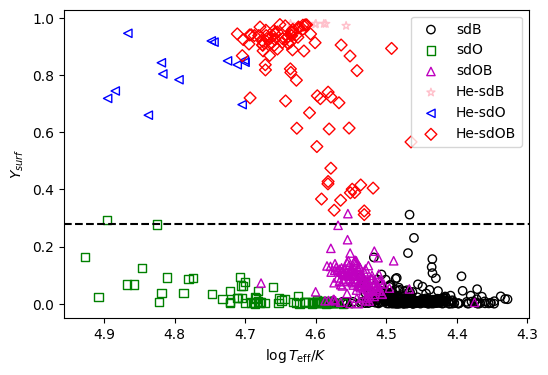

In [5]:
plt.figure(dpi=100, figsize=(6, 4))
ax = plt.gca()
# 创建一个字典来映射 he_class 的值到颜色和标记
class_to_marker = {
    'sdB': ('k', 'o'),  # 黑色圆圈
    'sdO': ('g', 's'),  # 绿色正方形
    'sdOB': ('m', '^'),  # 紫色正三角形
    'He-sdB': ('pink', '*'),  # 粉红色五角星
    'He-sdO': ('b', '<'),  # 蓝色左三角
    'He-sdOB': ('r', 'D')  # 红色菱形
}
for cls, (color, marker) in class_to_marker.items():
    mask = he_class == cls
    ax.scatter(log_Teff[mask], Y_surf[mask], color=color, marker=marker, facecolors='none', label=cls)

plt.axhline(y=0.28, color='black', linestyle='dashed')
ax.legend()
ax.invert_xaxis()
# ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log L$ /$L_\odot$')
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$Y_{surf}$')
plt.show()

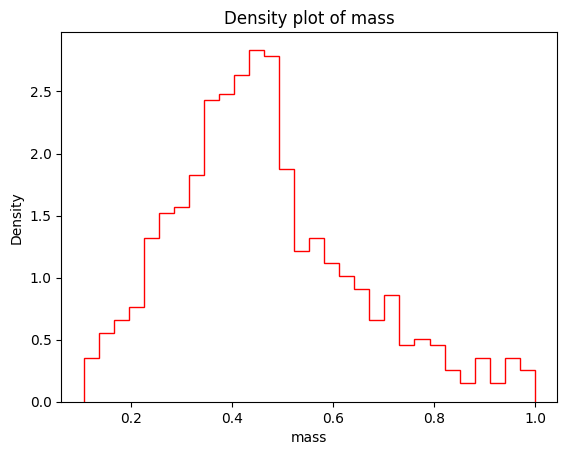

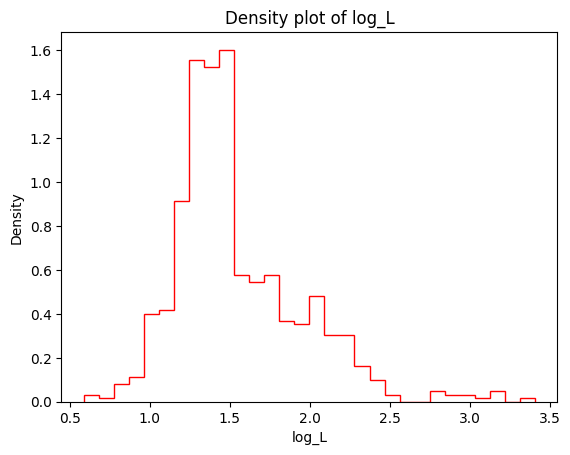

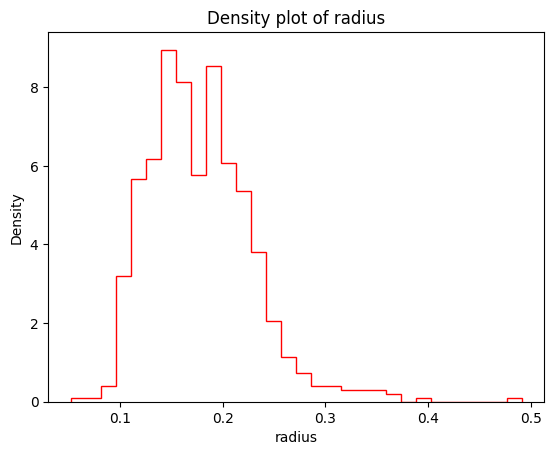

In [6]:
def plot_density(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins=30, density=True, alpha=1, histtype='step', edgecolor='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    # plt.show()

plot_density(mass, 'Density plot of mass', 'mass')
plot_density(log_L, 'Density plot of log_L', 'log_L')
plot_density(radius, 'Density plot of radius', 'radius')
# plot_density(age, 'Density plot of age', 'age')